In [1]:
import os
images_path = "images"
annotations_path = "annotations"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generador_entrenamiento = ImageDataGenerator()
datos_entrenamiento = generador_entrenamiento.flow_from_directory("train")
generador_test = ImageDataGenerator()
datos_test = generador_test.flow_from_directory("test", class_mode=None)
algunas_imagenes = next(datos_test)

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


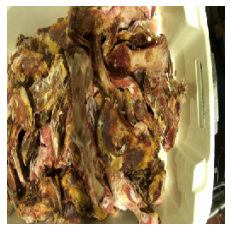

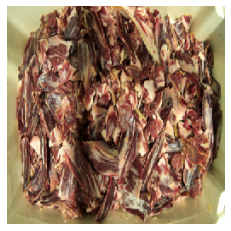

In [3]:
from matplotlib import pyplot as plt
plt.imshow(algunas_imagenes[0]/255.)
plt.axis('off')
plt.show()
plt.imshow(algunas_imagenes[1]/255.)
plt.axis('off')
plt.show()

In [4]:
from tensorflow.keras import applications
inception = applications.InceptionV3(include_top=False, input_shape=(256, 256, 3))

2022-09-04 19:43:49.960008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


87910968/87910968 [==============================] - 10s 0us/step


In [5]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
predictor = Sequential([
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(8, activation="softmax")
])
modelo = Sequential([inception, predictor])
modelo.compile(optimizer="adam", loss="categorical_crossentropy")

In [6]:
modelo.fit(datos_entrenamiento, epochs=10)

Epoch 1/10
52/52 [==============================] - 258s 5s/step - loss: 2.1022
Epoch 2/10
52/52 [==============================] - 287s 6s/step - loss: 1.0371
Epoch 3/10
52/52 [==============================] - 282s 5s/step - loss: 0.6767
Epoch 4/10
52/52 [==============================] - 276s 5s/step - loss: 0.5171
Epoch 5/10
52/52 [==============================] - 265s 5s/step - loss: 2.0421
Epoch 6/10
52/52 [==============================] - 235s 4s/step - loss: 0.6485
Epoch 7/10
52/52 [==============================] - 232s 4s/step - loss: 0.5571
Epoch 8/10
52/52 [==============================] - 235s 5s/step - loss: 0.7760
Epoch 9/10
52/52 [==============================] - 231s 4s/step - loss: 0.4884
Epoch 10/10
52/52 [==============================] - 460s 9s/step - loss: 0.3909


In [9]:
lote_test = next(datos_test)

probs = modelo.predict(lote_test)
import numpy as np
clase = np.argmax(probs, -1)

1/1 [==============================] - 2s 2s/step


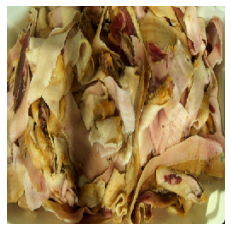

Predicción: CLASS_01


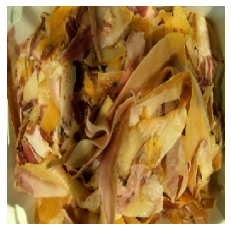

Predicción: CLASS_01


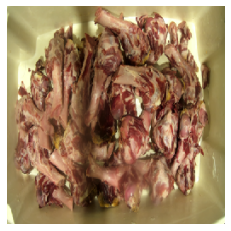

Predicción: CLASS_01


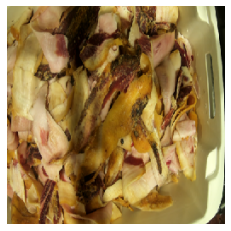

Predicción: CLASS_01


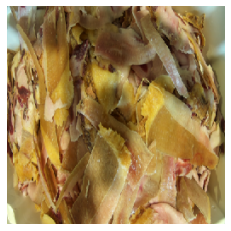

Predicción: CLASS_01


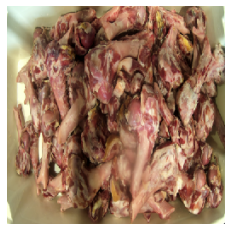

Predicción: CLASS_01


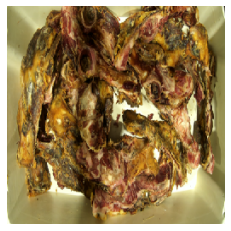

Predicción: CLASS_01


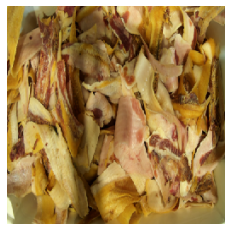

Predicción: CLASS_01


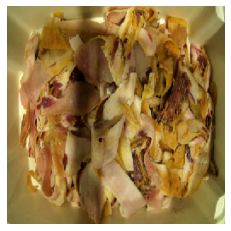

Predicción: CLASS_01


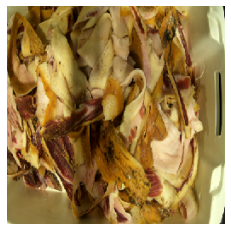

Predicción: CLASS_01


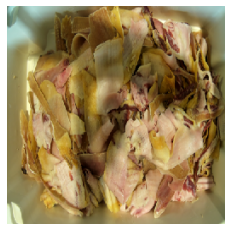

Predicción: CLASS_01


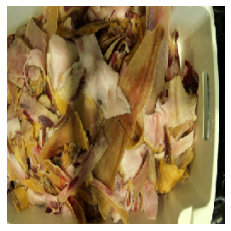

Predicción: CLASS_01


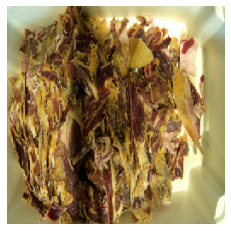

Predicción: CLASS_01


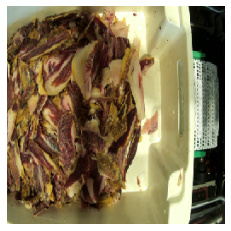

Predicción: CLASS_01


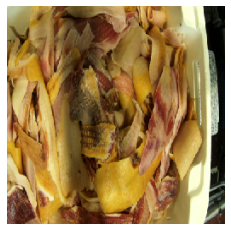

Predicción: CLASS_01


In [10]:
mostrar_imagenes = 15

for i in range(mostrar_imagenes):
    plt.imshow(lote_test[i]/255.)
    plt.axis('off')
    plt.show()
    print("Predicción:", "CLASS_01" if clase[i] else "CLASS_02")

keras.layers.core.dense.Dense